## Примеры построения интерактивных графиков с использованием IPython виджетов.
![plots_you_make](https://github.com/Samarov/interactive_charts_python/raw/main/screenshot_3d.png)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
from ipywidgets import interact
import ipywidgets as widgets

### Пример 1

In [3]:
from mpl_toolkits.mplot3d.axes3d import get_test_data

In [4]:
def contour_3D(Z=25):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')
    x, y, z = get_test_data(0.05)
    ax.plot_wireframe(x, y, z) #, rstride=10, cstride=10
    ax.view_init(30, Z)
    plt.close(fig)
    return fig

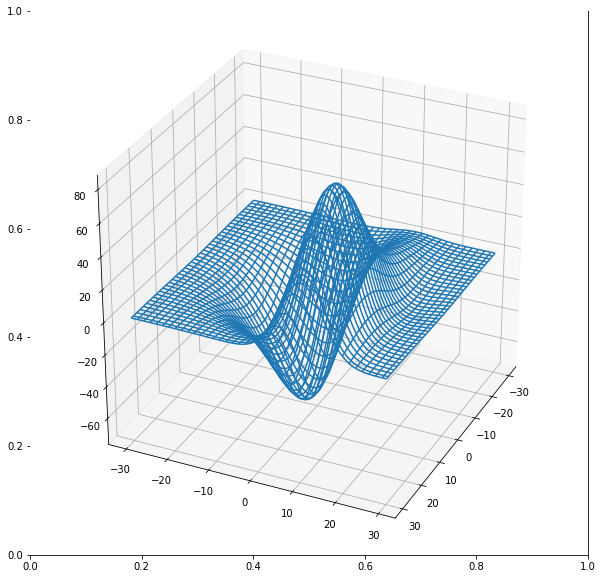

In [5]:
contour_3D()

In [6]:
interact(contour_3D, Z=widgets.IntSlider(min=-90, max=90, step=5, value=40));

interactive(children=(IntSlider(value=40, description='Z', max=90, min=-90, step=5), Output()), _dom_classes=(…

### Пример 2

In [7]:
def pie_chart(z=50):
    vals = [24, 17, z, 21, 35]
    labels = ['Ford', 'Toyota', 'BMV', 'AUDI', 'Jaguar']
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(vals, labels=labels, wedgeprops=dict(width=0.5))
    plt.close(fig)
    return fig

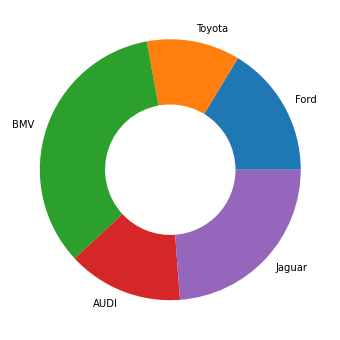

In [8]:
pie_chart()

In [9]:
interact(pie_chart, z=widgets.IntSlider(min=10, max=100, step=5, value=80));

interactive(children=(IntSlider(value=80, description='z', min=10, step=5), Output()), _dom_classes=('widget-i…

### Пример 3

In [10]:
def function_sin(z=2):
    t = np.arange(0.0, 2.0, 0.01)
    s = 1 + np.sin(z * np.pi * t)

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(t, s)

    ax.set(xlabel='time (s)', ylabel='voltage (mV)',
           title='About as simple as it gets, folks')
    ax.grid()
    plt.close(fig)
    return fig

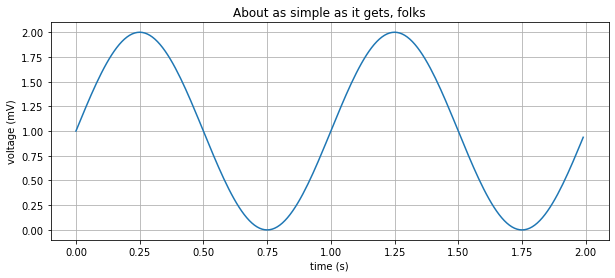

In [11]:
function_sin()

In [12]:
interact(function_sin, z=widgets.FloatSlider(min=0, max=10.0, step=0.5, value=8.0));

interactive(children=(FloatSlider(value=8.0, description='z', max=10.0, step=0.5), Output()), _dom_classes=('w…

### Пример 4

In [13]:
def function(mu = 5):
    X = stats.norm(loc=mu, scale=np.sqrt(mu))
    N = stats.poisson(mu)
    x = np.linspace(0, X.ppf(0.999))
    n = np.arange(0, x[-1])
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(x, X.pdf(x), color='black', lw=2, label="Normal($\mu=%d, \sigma^2=%d$)" % (mu, mu))
    ax.bar(n, N.pmf(n), align='edge', label=r"Poisson($\lambda=%d$)" % mu)
    ax.set_ylim(0, X.pdf(x).max() * 1.25)
    ax.legend(loc=2, ncol=2)
    plt.close(fig)
    return fig

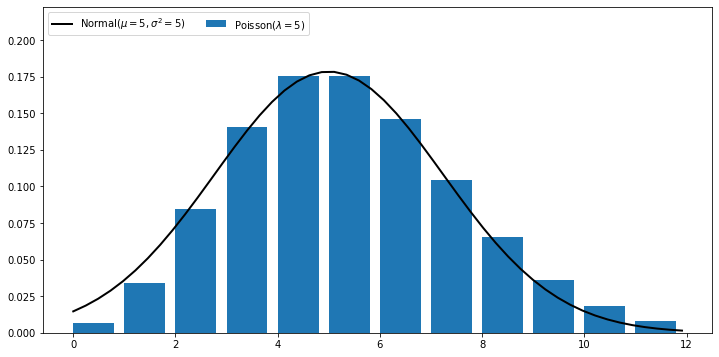

In [14]:
function()

In [15]:
interact(function, mu=widgets.FloatSlider(min=1.0, max=20.0, step=1.0, value=15.0));

interactive(children=(FloatSlider(value=15.0, description='mu', max=20.0, min=1.0, step=1.0), Output()), _dom_…